<a href="https://colab.research.google.com/github/Tirna2/IML/blob/main/Assignment_1%2Cquestion_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd

!wget https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls

# Load the dataset into a Pandas DataFrame
df = pd.read_excel('Concrete_Data.xls')

# Display the first few rows
print(df.head())


--2025-03-09 14:06:15--  https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘Concrete_Data.xls’

Concrete_Data.xls       [ <=>                ] 122.00K  --.-KB/s    in 0.1s    

2025-03-09 14:06:15 (1.12 MB/s) - ‘Concrete_Data.xls’ saved [124928]

   Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       

In [ ]:


import pandas as pd
from sklearn.model_selection import train_test_split

# ... (previous code)

# Identify independent and dependent variables
independent_variables = df.columns[:-1]  # All columns except the last one
dependent_variable = df.columns[-1]  # The last column

print("Independent Variables (Features):", independent_variables.tolist())
print("Dependent Variable (Compressive Strength):", dependent_variable)

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Handle missing values (if any) -  In this case, there are no missing values



# Split data into training and testing sets
X = df[independent_variables]
y = df[dependent_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #random_state for reproducibility

print("\nTraining set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Independent Variables (Features): ['Cement (component 1)(kg in a m^3 mixture)', 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)', 'Fly Ash (component 3)(kg in a m^3 mixture)', 'Water  (component 4)(kg in a m^3 mixture)', 'Superplasticizer (component 5)(kg in a m^3 mixture)', 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)', 'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)']
Dependent Variable (Compressive Strength): Concrete compressive strength(MPa, megapascals) 

Missing Values:
 Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete comp

In [ ]:


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error (MSE): {mse}")
print(f"Coefficient of Determination (R^2): {r2}")



Mean Squared Error (MSE): 95.97548435337708
Coefficient of Determination (R^2): 0.627541605542902


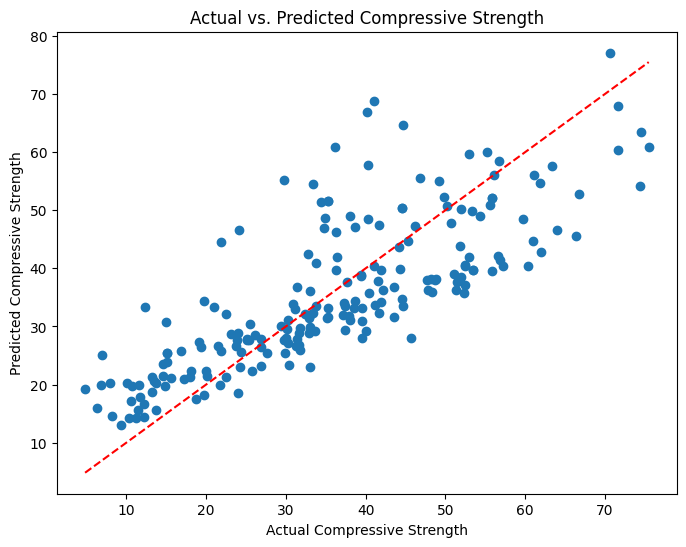

In [ ]:
# prompt: Plot the predicted vs. actual values to visualize model fit

import matplotlib.pyplot as plt

# Plot predicted vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Compressive Strength")
plt.ylabel("Predicted Compressive Strength")
plt.title("Actual vs. Predicted Compressive Strength")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Add a diagonal line for reference
plt.show()



Polynomial Degree 2:
Mean Squared Error (MSE): 55.58992637466713
Coefficient of Determination (R^2): 0.7842685049729758


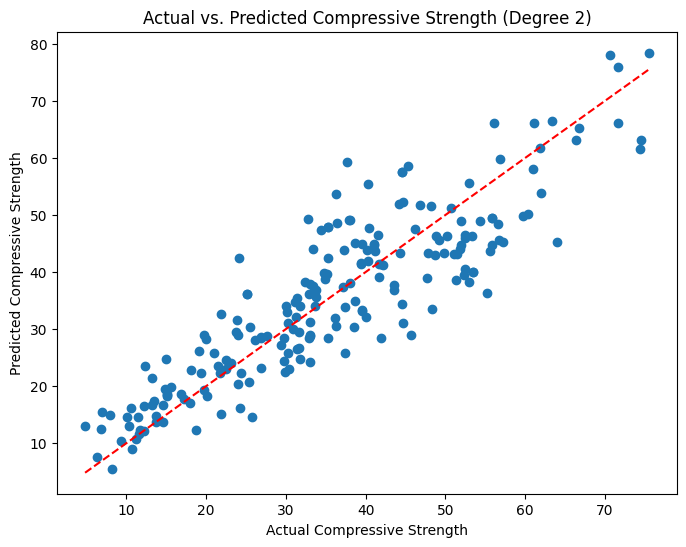


Polynomial Degree 3:
Mean Squared Error (MSE): 40.27099400746563
Coefficient of Determination (R^2): 0.8437176965319031


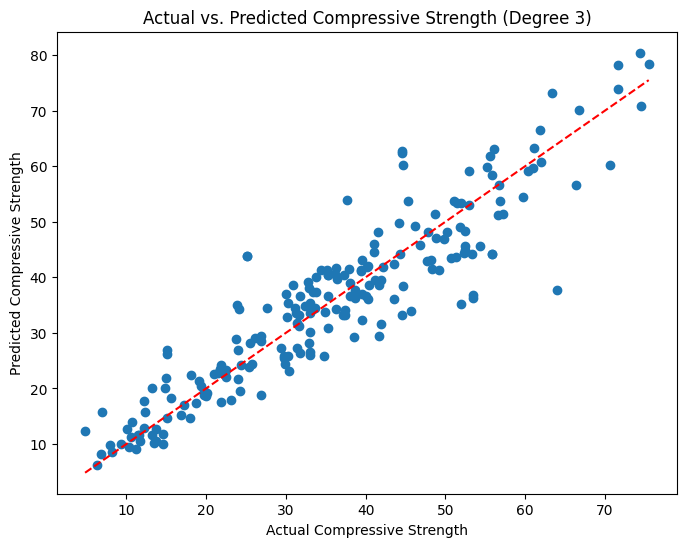


Polynomial Degree 4:
Mean Squared Error (MSE): 677.4235249658651
Coefficient of Determination (R^2): -1.62892216878274


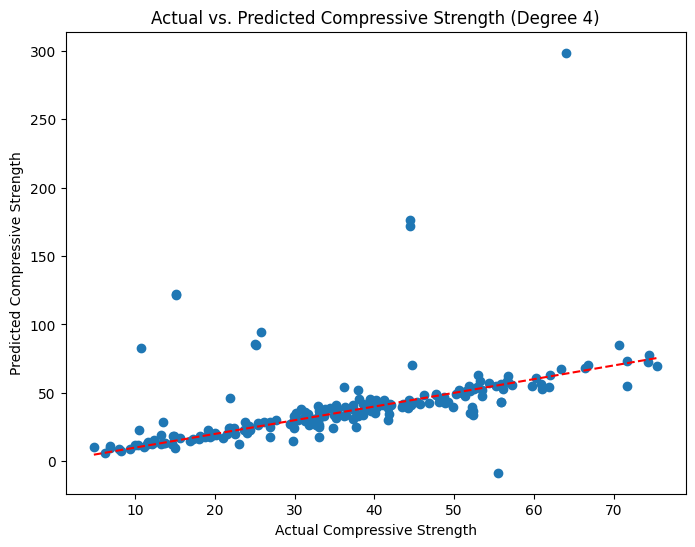

In [ ]:


import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# ... (previous code)

for k in [2, 3, 4]:
    # Polynomial Feature Transformation
    poly = PolynomialFeatures(degree=k)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Train Polynomial Regression Model
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)
    y_pred_poly = poly_model.predict(X_test_poly)

    # Evaluate Performance
    mse_k = mean_squared_error(y_test, y_pred_poly)
    r2_k = r2_score(y_test, y_pred_poly)
    print(f"\nPolynomial Degree {k}:")
    print(f"Mean Squared Error (MSE): {mse_k}")
    print(f"Coefficient of Determination (R^2): {r2_k}")

    # Plot predicted vs actual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred_poly)
    plt.xlabel("Actual Compressive Strength")
    plt.ylabel("Predicted Compressive Strength")
    plt.title(f"Actual vs. Predicted Compressive Strength (Degree {k})")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.show()


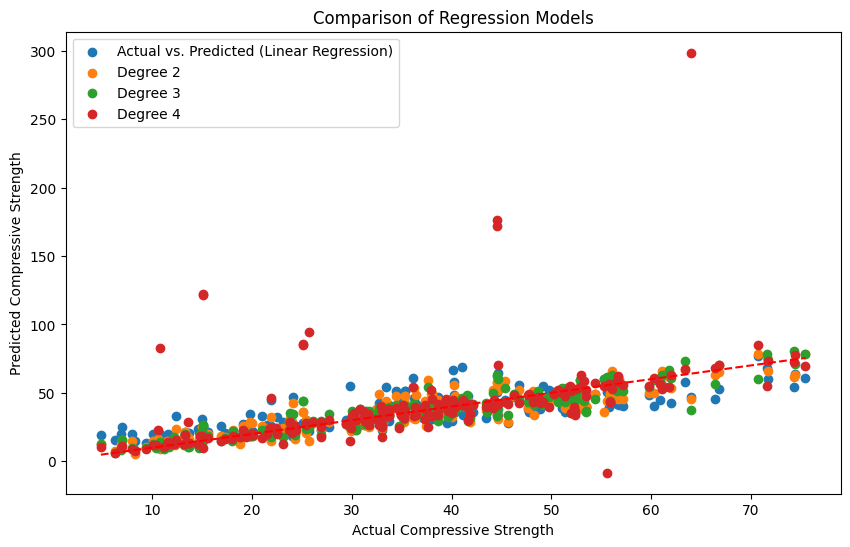


Model Comparison:
------------------
Linear Regression: MSE = 95.98, R^2 = 0.63
Polynomial Degree 2: MSE = 55.59, R^2 = 0.78
Polynomial Degree 3: MSE = 40.27, R^2 = 0.84
Polynomial Degree 4: MSE = 677.42, R^2 = -1.63


In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import numpy as np



# Overlay linear regression on scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label='Actual vs. Predicted (Linear Regression)')
plt.xlabel("Actual Compressive Strength")
plt.ylabel("Predicted Compressive Strength")
plt.title("Comparison of Regression Models")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

# Overlay polynomial regression curves
for k in [2, 3, 4]:
    poly = PolynomialFeatures(degree=k)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)
    y_pred_poly = poly_model.predict(X_test_poly)
    plt.scatter(y_test, y_pred_poly, label=f'Degree {k}')

plt.legend()
plt.show()

# Compare MSE and R2 scores
print("\nModel Comparison:")
print("------------------")
print(f"Linear Regression: MSE = {mse:.2f}, R^2 = {r2:.2f}")

for k in [2, 3, 4]:
    poly = PolynomialFeatures(degree=k)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)
    y_pred_poly = poly_model.predict(X_test_poly)
    mse_k = mean_squared_error(y_test, y_pred_poly)
    r2_k = r2_score(y_test, y_pred_poly)
    print(f"Polynomial Degree {k}: MSE = {mse_k:.2f}, R^2 = {r2_k:.2f}")


In [ ]:



# Analysis
print("\nBias-Variance Tradeoff Analysis:")
print("--------------------------------")

# High Bias, Low Variance (Example)
# If the linear regression model has a high MSE and a relatively low R^2 compared to the polynomial models,
# it suggests high bias (underfitting).  The model is too simple to capture the complexity of the data.
# Its performance is consistent across different training sets (low variance) because it is overly simplified.

# Low Bias, High Variance (Example)
# If the degree 4 polynomial has an MSE that is not much better and a R^2 that is not much better than the lower degree polynomials, it suggests high variance.
# The complex model has learned the noise in the training data very well.
# Its performance will be significantly different with each new training set.


# Balanced Bias-Variance (Example)
# If the degree 2 or degree 3 models have lower MSE and higher R^2 than the linear model, and also not much worse than degree 4 polynomial model, it implies a better balance between bias and variance.
# They can capture some of the underlying patterns in the data without overfitting to the training set's noise.


# 2. Higher-Degree Polynomials and Overfitting
print("\nHigher-Degree Polynomials and Overfitting:")
print("----------------------------------------")
print("Higher-degree polynomials tend to overfit because they create more complex curves that can closely fit")
print("the training data points, including the noise.  In essence, the model becomes too flexible")
print("and learns not only the general pattern but also the random fluctuations of the training set.")
print("When applied to new, unseen data, these complex curves are unlikely to generalize well,")
print("leading to poor performance and higher variance.")





Bias-Variance Tradeoff Analysis:
--------------------------------

Higher-Degree Polynomials and Overfitting:
----------------------------------------
Higher-degree polynomials tend to overfit because they create more complex curves that can closely fit
the training data points, including the noise.  In essence, the model becomes too flexible
and learns not only the general pattern but also the random fluctuations of the training set.
When applied to new, unseen data, these complex curves are unlikely to generalize well,
leading to poor performance and higher variance.
